In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# loading the csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gold_price_data.csv')

In [28]:
# print first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [29]:
# print the last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05/08/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [30]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [31]:
# getting some information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [32]:
# checking number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [33]:
# statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [34]:
correlation = gold_data.corr

In [13]:
# constructing a heatmap tp understand the correlation
#plt.figure(figsize = (8,8))
#sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [14]:
# correlation values of GLD
#print(correlation['GLD'])

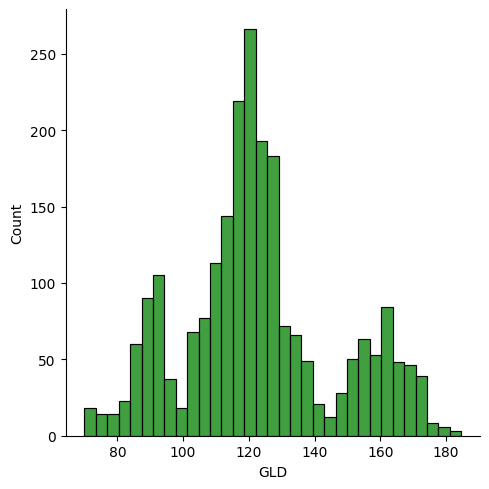

In [15]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

In [16]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [20]:
regressor = RandomForestRegressor(n_estimators=100)

In [21]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [22]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [23]:
print(test_data_prediction)

[168.63199966  81.83109991 116.06590014 127.68500064 120.62860165
 154.67779752 150.16809888 126.19520065 117.43199883 125.96030085
 116.84620092 172.42150067 141.18159824 167.9591989  115.28970019
 117.54520012 139.39920274 170.29580118 159.24200325 159.45119922
 155.06260048 125.38460011 176.25559915 157.07520375 125.2226005
  94.11619973  77.76330008 120.63349985 118.92899848 167.45550042
  88.1398004  125.15710023  91.28570094 117.7549006  120.96859917
 136.46700034 115.48950132 115.14170056 147.63580024 107.17520113
 104.41650239  87.16809795 126.51380058 117.78479938 154.45859862
 119.64809992 108.36540015 108.26109824  93.20820092 127.14819767
  75.05150031 113.70689943 121.32100007 111.23779935 118.948799
 120.42749925 159.10649974 166.56830182 146.67739652  85.84359851
  94.25970018  86.75969891  90.63610021 118.92520047 126.44530054
 127.61109989 168.82800001 122.30299917 117.25979914  98.63790037
 168.00370165 143.20079822 132.41050232 121.09940231 120.34159969
 119.73660061

In [24]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9891301697603949


In [25]:
Y_test = list(Y_test)

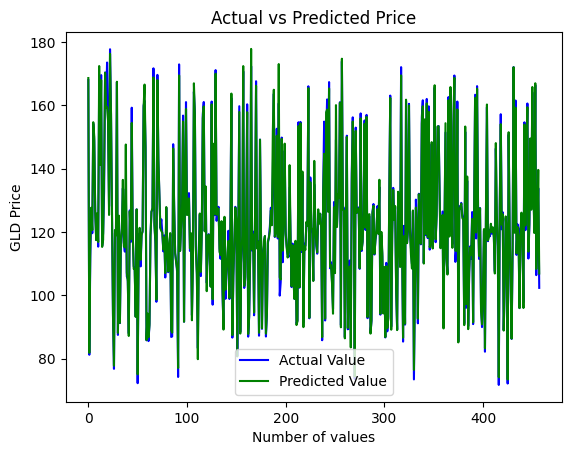

In [26]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [27]:
import pandas as pd

# Example: Replace these values with today's actual data
today_data = pd.DataFrame({
    'SPX': [4500],     # S&P 500 Index value (adjust as needed)
    'USO': [70],       # Crude Oil price (adjust as needed)
    'SLV': [25],       # Silver price (adjust as needed)
    'EUR/USD': [1.1]   # EUR/USD exchange rate (adjust as needed)
})

# Predicting today's Gold Price using the trained model
future_price = regressor.predict(today_data)

print("🔮 Predicted Gold Price for today:", future_price[0])


🔮 Predicted Gold Price for today: 151.08050085000005
